# Modelo SARIMAX

---
O modelo implementado a seguir mostra os resultados para o algoritmo SARIMAX, incluindo variáveis exógenas (preditores diversos do valor a ser analizado na série temporal).

___

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import math
import requests
import json
import os
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from math import sqrt
from sklearn.metrics import mean_squared_error
import itertools
import pmdarima as pm

from statsmodels.tsa.statespace.sarimax import SARIMAX

import warnings
warnings.filterwarnings("ignore")

from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

## 1. Importando os datasets

In [3]:
dataset_cluster2_series = pd.read_csv("..//datasets//dataset_cluster2_series.csv")
dataset_cluster2_validacao = pd.read_csv("..//datasets//dataset_cluster2_validation.csv")


In [4]:
dataset_cluster2_series.head(20)

,mes,indice_pimpf,ipca,taxa_selic,taxa_cambio,ibcbr,tjlp,pib_mensal,preco_brent,desembolso,arrecadacao
0,2004-01-01 00:00:00,104.0,0.76,16.32,136.19,98.59,10.00,1735331.5,31.18,1107.0,6.709728e+09
1,2004-02-01 00:00:00,103.1,0.61,16.30,139.84,99.45,10.00,1746819.2,30.87,2559.0,5.844144e+09
2,2004-03-01 00:00:00,113.0,0.47,16.19,138.89,111.98,10.00,1765492.2,33.80,4302.0,5.757594e+09
3,2004-04-01 00:00:00,107.8,0.37,15.96,138.85,107.36,9.75,1781058.0,33.36,5474.0,7.872113e+09
4,2004-05-01 00:00:00,108.9,0.51,15.77,148.25,106.03,9.75,1800951.1,37.92,5976.0,7.156122e+09
5,2004-06-01 00:00:00,113.1,0.71,15.80,149.04,107.00,9.75,1828299.9,35.19,7338.0,7.048868e+09
6,2004-07-01 00:00:00,110.9,0.91,15.77,143.11,111.47,9.75,1853700.2,38.37,8251.0,8.450281e+09
7,2004-08-01 00:00:00,113.2,0.69,15.86,140.62,110.65,9.75,1878059.7,43.03,8887.0,7.101401e+09
8,2004-09-01 00:00:00,107.6,0.33,16.09,135.23,109.21,9.75,1894202.4,43.38,9562.0,7.709141e+09
9,2004-10-01 00:00:00,103.8,0.44,16.41,133.55,108.89,9.75,1909813.0,49.82,11099.0,8.787191e+09


In [5]:
dataset_cluster2_validacao.head(20)

,mes,indice_pimpf,ipca,taxa_selic,taxa_cambio,ibcbr,tjlp,pib_mensal,preco_brent,desembolso,arrecadacao
0,2020-01-01 00:00:00,101.5,0.21,4.40,116.16,133.60,5.09,7435826.2,63.60,257.0,3.553139e+10
1,2020-02-01 00:00:00,99.6,0.25,4.19,121.84,134.63,5.09,7463826.9,55.00,792.0,2.220378e+10
2,2020-03-01 00:00:00,95.7,0.07,3.95,136.52,136.72,5.09,7485253.1,32.98,1294.0,1.932962e+10
3,2020-04-01 00:00:00,68.2,-0.31,3.65,147.97,119.13,4.94,7422874.5,23.34,2254.0,2.014531e+10
4,2020-05-01 00:00:00,76.2,-0.38,3.01,157.50,119.79,4.94,7365193.7,31.02,3078.0,1.314481e+10
5,2020-06-01 00:00:00,90.3,0.26,2.58,145.32,126.18,4.94,7359646.6,39.93,4283.0,1.234030e+10
6,2020-07-01 00:00:00,96.8,0.36,2.15,148.27,135.82,4.91,7349280.0,42.81,4883.0,1.983441e+10
7,2020-08-01 00:00:00,97.5,0.24,1.94,153.47,135.50,4.91,7348772.7,44.26,7081.0,2.206463e+10
8,2020-09-01 00:00:00,104.9,0.64,1.90,150.84,137.14,4.91,7367379.0,41.09,7525.0,2.362301e+10
9,2020-10-01 00:00:00,101.2,0.86,1.90,155.93,139.62,4.55,7386165.6,40.47,8319.0,3.264090e+10


In [6]:
# Montado as séries de entrada (arrecadação e demais variáveis) e as séries de validação (arrecadação e demais variáveis)



serie_cluster2 = dataset_cluster2_series.copy()
serie_cluster2_exog = dataset_cluster2_series.copy()

validacao_cluster2 = dataset_cluster2_validacao.copy()
validacao_cluster2_exog = dataset_cluster2_validacao.copy()


serie_cluster2 = serie_cluster2.drop(['indice_pimpf', 'ipca', 'taxa_selic', 'taxa_cambio', 'ibcbr',
                                     'tjlp','pib_mensal','preco_brent','desembolso'], axis=1)
serie_cluster2_exog = serie_cluster2_exog.drop(['arrecadacao'], axis=1)

validacao_cluster2 = validacao_cluster2.drop(['indice_pimpf', 'ipca', 'taxa_selic', 'taxa_cambio', 'ibcbr',
                                     'tjlp','pib_mensal','preco_brent','desembolso'], axis=1)
validacao_cluster2_exog = validacao_cluster2_exog.drop(['arrecadacao'], axis=1)




In [7]:
serie_cluster2.head()

,mes,arrecadacao
0,2004-01-01 00:00:00,6.709728e+09
1,2004-02-01 00:00:00,5.844144e+09
2,2004-03-01 00:00:00,5.757594e+09
3,2004-04-01 00:00:00,7.872113e+09
4,2004-05-01 00:00:00,7.156122e+09


In [8]:
serie_cluster2_exog.head()

,mes,indice_pimpf,ipca,taxa_selic,taxa_cambio,ibcbr,tjlp,pib_mensal,preco_brent,desembolso
0,2004-01-01 00:00:00,104.0,0.76,16.32,136.19,98.59,10.00,1735331.5,31.18,1107.0
1,2004-02-01 00:00:00,103.1,0.61,16.30,139.84,99.45,10.00,1746819.2,30.87,2559.0
2,2004-03-01 00:00:00,113.0,0.47,16.19,138.89,111.98,10.00,1765492.2,33.80,4302.0
3,2004-04-01 00:00:00,107.8,0.37,15.96,138.85,107.36,9.75,1781058.0,33.36,5474.0
4,2004-05-01 00:00:00,108.9,0.51,15.77,148.25,106.03,9.75,1800951.1,37.92,5976.0


In [9]:
validacao_cluster2.head()

,mes,arrecadacao
0,2020-01-01 00:00:00,3.553139e+10
1,2020-02-01 00:00:00,2.220378e+10
2,2020-03-01 00:00:00,1.932962e+10
3,2020-04-01 00:00:00,2.014531e+10
4,2020-05-01 00:00:00,1.314481e+10


In [10]:
validacao_cluster2_exog.head()

,mes,indice_pimpf,ipca,taxa_selic,taxa_cambio,ibcbr,tjlp,pib_mensal,preco_brent,desembolso
0,2020-01-01 00:00:00,101.5,0.21,4.40,116.16,133.60,5.09,7435826.2,63.60,257.0
1,2020-02-01 00:00:00,99.6,0.25,4.19,121.84,134.63,5.09,7463826.9,55.00,792.0
2,2020-03-01 00:00:00,95.7,0.07,3.95,136.52,136.72,5.09,7485253.1,32.98,1294.0
3,2020-04-01 00:00:00,68.2,-0.31,3.65,147.97,119.13,4.94,7422874.5,23.34,2254.0
4,2020-05-01 00:00:00,76.2,-0.38,3.01,157.50,119.79,4.94,7365193.7,31.02,3078.0


In [11]:
## Modificando as escalas. Como os datasets possuem dimensões diferentes, serão criados 4 scalers separados

scaler_in = MinMaxScaler(feature_range=(0, 1))
scaler_in_exog = MinMaxScaler(feature_range=(0, 1))

scaler_valid = MinMaxScaler(feature_range=(0, 1))
scaler_valid_exog = MinMaxScaler(feature_range=(0, 1))

serie_cluster2 = pd.DataFrame(scaler_in.fit_transform(serie_cluster2[['arrecadacao']]))
serie_cluster2_exog = pd.DataFrame(scaler_in_exog.fit_transform(serie_cluster2_exog[['indice_pimpf', 'ipca', 'taxa_selic', 
                                'taxa_cambio', 'ibcbr', 'tjlp','pib_mensal','preco_brent','desembolso']]))

# Definindo um scaler específico para a validação


validacao_cluster2 = pd.DataFrame(scaler_valid.fit_transform(validacao_cluster2[['arrecadacao']]))
validacao_cluster2_exog = pd.DataFrame(scaler_valid_exog.fit_transform(validacao_cluster2_exog[['indice_pimpf', 'ipca', 
                                'taxa_selic', 'taxa_cambio', 'ibcbr', 'tjlp','pib_mensal','preco_brent','desembolso']]))


In [12]:
serie_cluster2.columns=['arrecadacao']
serie_cluster2_exog.columns=['indice_pimpf', 'ipca','taxa_selic', 'taxa_cambio', 'ibcbr', 'tjlp',
                             'pib_mensal','preco_brent','desembolso']
validacao_cluster2.columns=['arrecadacao']
validacao_cluster2_exog.columns=['indice_pimpf', 'ipca','taxa_selic', 'taxa_cambio', 'ibcbr', 
                                 'tjlp','pib_mensal','preco_brent','desembolso']
serie_cluster2.head()

,arrecadacao
0,0.032581
1,0.002962
2,0.000000
3,0.072356
4,0.047856


In [13]:
## Montando os datasets com arrecadação e variáveis exógenas e colocando o mês como índice da série


serie_cluster2.index = dataset_cluster2_series.mes

serie_cluster2_exog.index = dataset_cluster2_series.mes

validacao_cluster2.index = dataset_cluster2_validacao.mes

validacao_cluster2_exog.index = dataset_cluster2_validacao.mes




In [14]:

serie_cluster2.head()

,arrecadacao
mes,
2004-01-01 00:00:00,0.032581
2004-02-01 00:00:00,0.002962
2004-03-01 00:00:00,0.000000
2004-04-01 00:00:00,0.072356
2004-05-01 00:00:00,0.047856


In [15]:

validacao_cluster2.head()

,arrecadacao
mes,
2020-01-01 00:00:00,1.000000
2020-02-01 00:00:00,0.425313
2020-03-01 00:00:00,0.301380
2020-04-01 00:00:00,0.336552
2020-05-01 00:00:00,0.034691


In [16]:
dataset_cluster2_series.head()

,mes,indice_pimpf,ipca,taxa_selic,taxa_cambio,ibcbr,tjlp,pib_mensal,preco_brent,desembolso,arrecadacao
0,2004-01-01 00:00:00,104.0,0.76,16.32,136.19,98.59,10.00,1735331.5,31.18,1107.0,6.709728e+09
1,2004-02-01 00:00:00,103.1,0.61,16.30,139.84,99.45,10.00,1746819.2,30.87,2559.0,5.844144e+09
2,2004-03-01 00:00:00,113.0,0.47,16.19,138.89,111.98,10.00,1765492.2,33.80,4302.0,5.757594e+09
3,2004-04-01 00:00:00,107.8,0.37,15.96,138.85,107.36,9.75,1781058.0,33.36,5474.0,7.872113e+09
4,2004-05-01 00:00:00,108.9,0.51,15.77,148.25,106.03,9.75,1800951.1,37.92,5976.0,7.156122e+09


In [17]:

serie_cluster2.head()


,arrecadacao
mes,
2004-01-01 00:00:00,0.032581
2004-02-01 00:00:00,0.002962
2004-03-01 00:00:00,0.000000
2004-04-01 00:00:00,0.072356
2004-05-01 00:00:00,0.047856


In [18]:
serie_cluster2_exog.head()


,indice_pimpf,ipca,taxa_selic,taxa_cambio,ibcbr,tjlp,pib_mensal,preco_brent,desembolso
mes,,,,,,,,,
2004-01-01 00:00:00,0.583799,0.638710,0.773747,0.853109,0.000000,1.00,0.000000,0.003687,0.009199
2004-02-01 00:00:00,0.558659,0.541935,0.772427,0.894833,0.016063,1.00,0.002025,0.000679,0.028092
2004-03-01 00:00:00,0.835196,0.451613,0.765172,0.883973,0.250093,1.00,0.005318,0.029106,0.050771
2004-04-01 00:00:00,0.689944,0.387097,0.750000,0.883516,0.163803,0.95,0.008062,0.024837,0.066020
2004-05-01 00:00:00,0.720670,0.477419,0.737467,0.990969,0.138962,0.95,0.011570,0.069079,0.072552


In [19]:
validacao_cluster2.head(12)

,arrecadacao
mes,
2020-01-01 00:00:00,1.000000
2020-02-01 00:00:00,0.425313
2020-03-01 00:00:00,0.301380
2020-04-01 00:00:00,0.336552
2020-05-01 00:00:00,0.034691
2020-06-01 00:00:00,0.000000
2020-07-01 00:00:00,0.323146
2020-08-01 00:00:00,0.419313
2020-09-01 00:00:00,0.486510


In [20]:
validacao_cluster2_exog.head(12)

,indice_pimpf,ipca,taxa_selic,taxa_cambio,ibcbr,tjlp,pib_mensal,preco_brent,desembolso
mes,,,,,,,,,
2020-01-01 00:00:00,0.792857,0.341040,1.000,0.000000,0.706198,1.000000,0.637846,1.000000,0.000000
2020-02-01 00:00:00,0.747619,0.364162,0.916,0.137397,0.756467,1.000000,0.843009,0.786388,0.043090
2020-03-01 00:00:00,0.654762,0.260116,0.820,0.492501,0.858468,1.000000,1.000000,0.239444,0.083521
2020-04-01 00:00:00,0.000000,0.040462,0.700,0.769473,0.000000,0.722222,0.542948,0.000000,0.160841
2020-05-01 00:00:00,0.190476,0.000000,0.444,1.000000,0.032211,0.722222,0.120318,0.190760,0.227207
2020-06-01 00:00:00,0.526190,0.369942,0.272,0.705370,0.344070,0.722222,0.079674,0.412072,0.324259
2020-07-01 00:00:00,0.680952,0.427746,0.100,0.776730,0.814544,0.666667,0.003717,0.483607,0.372584
2020-08-01 00:00:00,0.697619,0.358382,0.016,0.902516,0.798926,0.666667,0.000000,0.519622,0.549613
2020-09-01 00:00:00,0.873810,0.589595,0.000,0.838897,0.878965,0.666667,0.136329,0.440884,0.585374


## 2. Implementando o modelo Auto-Arima

In [21]:
#Define função para calcular o MAPE - Mean Absolute Percentage Error
def mape(y_pred,y_true):

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [22]:
# Define a função para calcular o RMSE 

def rmse(y_pred, y_true):
    return sqrt(mean_squared_error(y_true, y_pred))

In [23]:
# Ajustar parâmetros de plotagem
#plt.rcParams.keys()
plt.rcParams["text.color"] = 'Blue'
plt.rcParams["axes.titlesize"] = 20
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["legend.fontsize"] = 12
plt.rcParams["figure.figsize"] = [15, 6]
plt.rcParams["lines.linewidth"] = 2.0

### 2.1 Separando os dataframes de treino e teste

In [24]:
# Utilizando 80% do dataset para treino e 20% para teste

train, test = serie_cluster2[:144], serie_cluster2[144:]
train_exog, test_exog = serie_cluster2_exog[:144], serie_cluster2_exog[144:]

In [25]:
len(train)

144

In [26]:
len(test)

48

In [27]:
train = pd.Series(train['arrecadacao'].values, index=train.index)
train.head()

mes
2004-01-01 00:00:00    0.032581
2004-02-01 00:00:00    0.002962
2004-03-01 00:00:00    0.000000
2004-04-01 00:00:00    0.072356
2004-05-01 00:00:00    0.047856
dtype: float64

In [28]:
test = pd.Series(test['arrecadacao'].values, index=test.index)

test.head()

mes
2016-01-01 00:00:00    0.542972
2016-02-01 00:00:00    0.273629
2016-03-01 00:00:00    0.319853
2016-04-01 00:00:00    0.358124
2016-05-01 00:00:00    0.317699
dtype: float64

## 2.2 Treinando o modelo

---
O modelo será treinado com os seguintes parâmetros:
<ul>
    <li>m = 12, para um período de 12 meses</li>
    <li>stationarity = False, uma vez que a série não é estacionária, como visto na análise exploratória</li>
    <li>seasonal = True, já que vimos que a série de arrecadação apresenta sazonalidade</li>
    <li>stepwise = False, aproveitando o reduzido tamanho da série para analisar todas as combinações de hiperparâmetros</li>
    <li>trend = t</li>
</ul>    

In [29]:
cluster2_aarima = pm.auto_arima(train, X = train_exog,  m=12, stationarity=False, seasonal=True, stepwise=False,
                           supress_warnings=True, error_action='ignore', trace=True, trend = 't')


# cluster2_aarima.fit(train)

 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-437.384, Time=0.23 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=-459.466, Time=0.41 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=-465.741, Time=1.01 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=-463.853, Time=0.55 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=-465.784, Time=0.70 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=-463.381, Time=2.21 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=-470.212, Time=1.06 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=-467.095, Time=1.50 sec
 ARIMA(0,0,0)(2,1,2)[12] intercept   : AIC=-463.911, Time=3.19 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=-437.213, Time=0.23 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-464.004, Time=1.27 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=-469.055, Time=2.10 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=-458.277, Time=0.72 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=-467.137, Time=1.55 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=-463.569, Time=3.88

In [30]:
cluster2_aarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 12)   Log Likelihood                 249.779
Date:                            Wed, 14 Jul 2021   AIC                           -471.557
Time:                                    14:41:26   BIC                           -431.198
Sample:                                01-01-2004   HQIC                          -455.157
                                     - 12-01-2015                                         
Covariance Type:                              opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
drift        -4.021e-05      0.000     -0.082      0.934      -0.001       0.001
indice_pimpf     0.0511      0.033      1.560      0.119      -0.013       0.115
ipca            -0.0013      0.031     -0.042      0.967      -0.063       0.060
taxa_selic       0.0962      0.044      2.202      0.028       0.011       0.182
taxa_cambio      0.0451      0.040      1.131      0.258      -0.033       0.123
ibcbr            0.0953      0.122      0.781      0.435      -0.144       0.334
tjlp            -0.0773      0.043     -1.802      0.071      -0.161       0.007
pib_mensal       0.4185      0.483      0.867      0.386      -0.528       1.365
preco_brent      0.0732      0.029      2.538      0.011       0.017       0.130
desembolso      -0.0102      0.039     -0.264      0.792      -0.086       0.066
ar.L1            0.1198      0.113      1.062      0.288      -0.101       0.341
ar.S.L12        -0.5726      0.108     -5.304      0.000      -0.784      -0.361
ar.S.L24        -0.2662      0.109     -2.435      0.015      -0.480      -0.052
sigma2           0.0013      0.000      7.790      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.46   Jarque-Bera (JB):               105.44
Prob(Q):                              0.50   Prob(JB):                         0.00
Heteroskedasticity (H):               1.86   Skew:                             1.29
Prob(H) (two-sided):                  0.04   Kurtosis:                         6.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 2.3 Grid Search para determinar o melhor conjunto de parâmetros

Créditos: https://towardsdatascience.com/grid-search-for-sarimax-parameters-adbd5104cb8b

In [31]:


### Define Parameter Ranges to Test ###

# Note: higher numbers will result in code taking much longer to run
# Here we have it set to test p,d,q each = 0, 1 & 2

# Define the p, d and q parameters to take any value between 0 and 3 (exclusive)
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
# Note: here we have 12 in the 's' position as we have monthly data
# You'll want to change this according to your time series' frequency
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

### Run Grid Search ###

# Note: this code will take a while to run

# Define function
def sarimax_gridsearch(ts,  ts_exog, pdq, pdqs, tendencia, maxiter=50,  freq='M'):
    '''
    Input: 
        ts : your time series data
        pdq : ARIMA combinations from above
        pdqs : seasonal ARIMA combinations from above
        maxiter : number of iterations, increase if your model isn't converging
        frequency : default='M' for month. Change to suit your time series frequency
            e.g. 'D' for day, 'H' for hour, 'Y' for year. 
        
    Return:
        Prints out top 5 parameter combinations
        Returns dataframe of parameter combinations ranked by BIC
    '''
    print("Running...")
    # Run a grid search with pdq and seasonal pdq parameters and get the best BIC value
    ans = []
    for comb in pdq:
        for combs in pdqs:
            try:
                print(combs)
                mod = sm.tsa.statespace.SARIMAX(ts, exog=ts_exog, # this is your time series you will input
                                                order=comb,
                                                seasonal_order=combs,
                                                enforce_stationarity=True,
                                                enforce_invertibility=True, trend = tendencia)

                output = mod.fit(maxiter=maxiter) 
                ans.append([comb, combs, output.bic])
                print('SARIMAX {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
            except:
                print("Leaving...")
                continue
            
    # Find the parameters with minimal BIC value

    # Convert into dataframe
    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])

    # Sort and return top 5 combinations
    ans_df = ans_df.sort_values(by=['aic'],ascending=True)[0:10]
    
    return ans_df
    
### Apply function to your time series data ###

# Remember to change frequency to match your time series data
sarimax_gridsearch(train, train_exog, pdq, pdqs, 't')


Running...
(0, 0, 0, 12)
SARIMAX (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =-332.0919868641311
(0, 0, 1, 12)
SARIMAX (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =-384.5324295795133
(0, 0, 2, 12)
SARIMAX (0, 0, 0) x (0, 0, 2, 12)12 : AIC Calculated =-420.23481609056523
(0, 1, 0, 12)
SARIMAX (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =-437.38438897033245
(0, 1, 1, 12)
SARIMAX (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =-459.46624436327284
(0, 1, 2, 12)
SARIMAX (0, 0, 0) x (0, 1, 2, 12)12 : AIC Calculated =-465.74055517054853
(0, 2, 0, 12)
SARIMAX (0, 0, 0) x (0, 2, 0, 12)12 : AIC Calculated =-278.2175475225258
(0, 2, 1, 12)
SARIMAX (0, 0, 0) x (0, 2, 1, 12)12 : AIC Calculated =-276.21757281647035
(0, 2, 2, 12)
SARIMAX (0, 0, 0) x (0, 2, 2, 12)12 : AIC Calculated =-274.2175728920129
(1, 0, 0, 12)
SARIMAX (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =-467.5156129089959
(1, 0, 1, 12)
SARIMAX (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =-301.8644621676087
(1, 0, 2, 12)
SARIMAX (0, 0

SARIMAX (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated =-399.119641574121
(1, 1, 2, 12)
SARIMAX (0, 1, 0) x (1, 1, 2, 12)12 : AIC Calculated =-395.1617200401014
(1, 2, 0, 12)
SARIMAX (0, 1, 0) x (1, 2, 0, 12)12 : AIC Calculated =-274.5672509515474
(1, 2, 1, 12)
SARIMAX (0, 1, 0) x (1, 2, 1, 12)12 : AIC Calculated =-267.42857292420086
(1, 2, 2, 12)
SARIMAX (0, 1, 0) x (1, 2, 2, 12)12 : AIC Calculated =-289.28149187713245
(2, 0, 0, 12)
SARIMAX (0, 1, 0) x (2, 0, 0, 12)12 : AIC Calculated =-395.55116971443215
(2, 0, 1, 12)
SARIMAX (0, 1, 0) x (2, 0, 1, 12)12 : AIC Calculated =-381.4019545150644
(2, 0, 2, 12)
SARIMAX (0, 1, 0) x (2, 0, 2, 12)12 : AIC Calculated =-378.09526815723524
(2, 1, 0, 12)
SARIMAX (0, 1, 0) x (2, 1, 0, 12)12 : AIC Calculated =-400.9825597852089
(2, 1, 1, 12)
SARIMAX (0, 1, 0) x (2, 1, 1, 12)12 : AIC Calculated =-405.5451670897332
(2, 1, 2, 12)
SARIMAX (0, 1, 0) x (2, 1, 2, 12)12 : AIC Calculated =-403.91811156036874
(2, 2, 0, 12)
SARIMAX (0, 1, 0) x (2, 2, 0, 12)12 : A

SARIMAX (0, 2, 0) x (2, 2, 2, 12)12 : AIC Calculated =-226.40895103717247
(0, 0, 0, 12)
SARIMAX (0, 2, 1) x (0, 0, 0, 12)12 : AIC Calculated =-146.69092808597975
(0, 0, 1, 12)
SARIMAX (0, 2, 1) x (0, 0, 1, 12)12 : AIC Calculated =-169.8464258008621
(0, 0, 2, 12)
SARIMAX (0, 2, 1) x (0, 0, 2, 12)12 : AIC Calculated =-232.77455679814943
(0, 1, 0, 12)
SARIMAX (0, 2, 1) x (0, 1, 0, 12)12 : AIC Calculated =-332.90558879169953
(0, 1, 1, 12)
SARIMAX (0, 2, 1) x (0, 1, 1, 12)12 : AIC Calculated =-353.215574768417
(0, 1, 2, 12)
SARIMAX (0, 2, 1) x (0, 1, 2, 12)12 : AIC Calculated =-353.2164306556191
(0, 2, 0, 12)
SARIMAX (0, 2, 1) x (0, 2, 0, 12)12 : AIC Calculated =-162.14537593867183
(0, 2, 1, 12)
SARIMAX (0, 2, 1) x (0, 2, 1, 12)12 : AIC Calculated =-160.14590992934654
(0, 2, 2, 12)
SARIMAX (0, 2, 1) x (0, 2, 2, 12)12 : AIC Calculated =-158.14577902795423
(1, 0, 0, 12)
SARIMAX (0, 2, 1) x (1, 0, 0, 12)12 : AIC Calculated =-253.63082073293242
(1, 0, 1, 12)
SARIMAX (0, 2, 1) x (1, 0, 1, 12)12 

SARIMAX (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated =-463.94449270125347
(1, 1, 1, 12)
SARIMAX (1, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated =-465.88896587093495
(1, 1, 2, 12)
SARIMAX (1, 0, 1) x (1, 1, 2, 12)12 : AIC Calculated =-453.36576745977425
(1, 2, 0, 12)
SARIMAX (1, 0, 1) x (1, 2, 0, 12)12 : AIC Calculated =-308.587192966977
(1, 2, 1, 12)
SARIMAX (1, 0, 1) x (1, 2, 1, 12)12 : AIC Calculated =-323.68902284304284
(1, 2, 2, 12)
SARIMAX (1, 0, 1) x (1, 2, 2, 12)12 : AIC Calculated =-305.23424183322527
(2, 0, 0, 12)
SARIMAX (1, 0, 1) x (2, 0, 0, 12)12 : AIC Calculated =-459.38924620741125
(2, 0, 1, 12)
SARIMAX (1, 0, 1) x (2, 0, 1, 12)12 : AIC Calculated =-467.21911256191606
(2, 0, 2, 12)
SARIMAX (1, 0, 1) x (2, 0, 2, 12)12 : AIC Calculated =-463.16669947332446
(2, 1, 0, 12)
SARIMAX (1, 0, 1) x (2, 1, 0, 12)12 : AIC Calculated =-468.44179007967125
(2, 1, 1, 12)
SARIMAX (1, 0, 1) x (2, 1, 1, 12)12 : AIC Calculated =-468.863883685544
(2, 1, 2, 12)
SARIMAX (1, 0, 1) x (2, 1, 2, 12)12 

SARIMAX (1, 1, 1) x (2, 2, 1, 12)12 : AIC Calculated =-338.55303476309007
(2, 2, 2, 12)
SARIMAX (1, 1, 1) x (2, 2, 2, 12)12 : AIC Calculated =-345.1176655294861
(0, 0, 0, 12)
SARIMAX (1, 1, 2) x (0, 0, 0, 12)12 : AIC Calculated =-252.28399483899915
(0, 0, 1, 12)
SARIMAX (1, 1, 2) x (0, 0, 1, 12)12 : AIC Calculated =-323.1089146269786
(0, 0, 2, 12)
SARIMAX (1, 1, 2) x (0, 0, 2, 12)12 : AIC Calculated =-380.54044829379814
(0, 1, 0, 12)
SARIMAX (1, 1, 2) x (0, 1, 0, 12)12 : AIC Calculated =-389.7275436447592
(0, 1, 1, 12)
SARIMAX (1, 1, 2) x (0, 1, 1, 12)12 : AIC Calculated =-423.96958926768934
(0, 1, 2, 12)
SARIMAX (1, 1, 2) x (0, 1, 2, 12)12 : AIC Calculated =-411.2690428146974
(0, 2, 0, 12)
SARIMAX (1, 1, 2) x (0, 2, 0, 12)12 : AIC Calculated =-235.55427490884136
(0, 2, 1, 12)
SARIMAX (1, 1, 2) x (0, 2, 1, 12)12 : AIC Calculated =-276.8722595371076
(0, 2, 2, 12)
SARIMAX (1, 1, 2) x (0, 2, 2, 12)12 : AIC Calculated =-281.36591233990424
(1, 0, 0, 12)
SARIMAX (1, 1, 2) x (1, 0, 0, 12)12 :

SARIMAX (1, 2, 2) x (1, 0, 2, 12)12 : AIC Calculated =-195.28967065249418
(1, 1, 0, 12)
SARIMAX (1, 2, 2) x (1, 1, 0, 12)12 : AIC Calculated =-349.6009399780953
(1, 1, 1, 12)
SARIMAX (1, 2, 2) x (1, 1, 1, 12)12 : AIC Calculated =-346.62512237576175
(1, 1, 2, 12)
SARIMAX (1, 2, 2) x (1, 1, 2, 12)12 : AIC Calculated =-340.3702308819713
(1, 2, 0, 12)
SARIMAX (1, 2, 2) x (1, 2, 0, 12)12 : AIC Calculated =-199.00528547499593
(1, 2, 1, 12)
SARIMAX (1, 2, 2) x (1, 2, 1, 12)12 : AIC Calculated =-208.41202076529993
(1, 2, 2, 12)
SARIMAX (1, 2, 2) x (1, 2, 2, 12)12 : AIC Calculated =-189.30155941656238
(2, 0, 0, 12)
SARIMAX (1, 2, 2) x (2, 0, 0, 12)12 : AIC Calculated =-183.79883721029003
(2, 0, 1, 12)
SARIMAX (1, 2, 2) x (2, 0, 1, 12)12 : AIC Calculated =-254.35742370333503
(2, 0, 2, 12)
SARIMAX (1, 2, 2) x (2, 0, 2, 12)12 : AIC Calculated =-189.56696212992216
(2, 1, 0, 12)
SARIMAX (1, 2, 2) x (2, 1, 0, 12)12 : AIC Calculated =-348.6642839320547
(2, 1, 1, 12)
SARIMAX (1, 2, 2) x (2, 1, 1, 12)12

SARIMAX (2, 0, 2) x (2, 2, 0, 12)12 : AIC Calculated =-367.2365799602069
(2, 2, 1, 12)
SARIMAX (2, 0, 2) x (2, 2, 1, 12)12 : AIC Calculated =-370.93959722216266
(2, 2, 2, 12)
SARIMAX (2, 0, 2) x (2, 2, 2, 12)12 : AIC Calculated =-318.83743130976836
(0, 0, 0, 12)
SARIMAX (2, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated =-285.3293435376553
(0, 0, 1, 12)
SARIMAX (2, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated =-401.99741625042907
(0, 0, 2, 12)
SARIMAX (2, 1, 0) x (0, 0, 2, 12)12 : AIC Calculated =-422.65733849221124
(0, 1, 0, 12)
SARIMAX (2, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated =-390.76131449011143
(0, 1, 1, 12)
SARIMAX (2, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated =-425.8428004904904
(0, 1, 2, 12)
SARIMAX (2, 1, 0) x (0, 1, 2, 12)12 : AIC Calculated =-424.66467529501017
(0, 2, 0, 12)
SARIMAX (2, 1, 0) x (0, 2, 0, 12)12 : AIC Calculated =-223.74730381571342
(0, 2, 1, 12)
SARIMAX (2, 1, 0) x (0, 2, 1, 12)12 : AIC Calculated =-309.1051787401161
(0, 2, 2, 12)
SARIMAX (2, 1, 0) x (0, 2, 2, 12)12 

SARIMAX (2, 2, 0) x (1, 0, 1, 12)12 : AIC Calculated =-246.88798113866244
(1, 0, 2, 12)
SARIMAX (2, 2, 0) x (1, 0, 2, 12)12 : AIC Calculated =-319.7130650404223
(1, 1, 0, 12)
SARIMAX (2, 2, 0) x (1, 1, 0, 12)12 : AIC Calculated =-344.49609389001967
(1, 1, 1, 12)
SARIMAX (2, 2, 0) x (1, 1, 1, 12)12 : AIC Calculated =-360.75481412375296
(1, 1, 2, 12)
SARIMAX (2, 2, 0) x (1, 1, 2, 12)12 : AIC Calculated =-334.4274699435929
(1, 2, 0, 12)
SARIMAX (2, 2, 0) x (1, 2, 0, 12)12 : AIC Calculated =-220.71988011096775
(1, 2, 1, 12)
SARIMAX (2, 2, 0) x (1, 2, 1, 12)12 : AIC Calculated =-205.67215382975792
(1, 2, 2, 12)
SARIMAX (2, 2, 0) x (1, 2, 2, 12)12 : AIC Calculated =-250.7896011317281
(2, 0, 0, 12)
SARIMAX (2, 2, 0) x (2, 0, 0, 12)12 : AIC Calculated =-266.4081638640023
(2, 0, 1, 12)
SARIMAX (2, 2, 0) x (2, 0, 1, 12)12 : AIC Calculated =-251.72951732165427
(2, 0, 2, 12)
SARIMAX (2, 2, 0) x (2, 0, 2, 12)12 : AIC Calculated =-257.24822792920367
(2, 1, 0, 12)
SARIMAX (2, 2, 0) x (2, 1, 0, 12)12 

,pdq,pdqs,aic
11,"(0, 0, 0)","(1, 0, 2, 12)",-438.004881
21,"(0, 0, 0)","(2, 1, 0, 12)",-432.735197
9,"(0, 0, 0)","(1, 0, 0, 12)",-431.877853
264,"(1, 0, 0)","(2, 1, 0, 12)",-431.197978
48,"(0, 0, 1)","(2, 1, 0, 12)",-429.941532
12,"(0, 0, 0)","(1, 1, 0, 12)",-429.258915
248,"(1, 0, 0)","(0, 1, 2, 12)",-428.826794
32,"(0, 0, 1)","(0, 1, 2, 12)",-428.696081
13,"(0, 0, 0)","(1, 1, 1, 12)",-428.307717
5,"(0, 0, 0)","(0, 1, 2, 12)",-428.264130


In [32]:


model= SARIMAX(train, 
 exog=train_exog,
 order=(0,0,0),
 seasonal_order=(1,0,2,12),              
 enforce_invertibility=True, enforce_stationarity=True,
              trend = 't')

results = model.fit()

In [33]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   SARIMAX Results                                   
=====================================================================================
Dep. Variable:                             y   No. Observations:                  144
Model:             SARIMAX(1, 0, [1, 2], 12)   Log Likelihood                 253.791
Date:                       Wed, 14 Jul 2021   AIC                           -479.582
Time:                               15:01:44   BIC                           -438.005
Sample:                           01-01-2004   HQIC                          -462.688
                                - 12-01-2015                                         
Covariance Type:                         opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
drift         2.284e-06      0.000      0.009      0.993      -0.001       0.001
indice_pimpf     0.0500      0.031      1.607      0.108      -0.011       0.111
ipca             0.0461      0.029      1.594      0.111      -0.011       0.103
taxa_selic       0.0979      0.040      2.473      0.013       0.020       0.175
taxa_cambio     -0.0223      0.040     -0.555      0.579      -0.101       0.056
ibcbr            0.0731      0.116      0.632      0.527      -0.154       0.300
tjlp            -0.0876      0.041     -2.155      0.031      -0.167      -0.008
pib_mensal       0.3732      0.395      0.944      0.345      -0.401       1.148
preco_brent      0.0366      0.026      1.387      0.165      -0.015       0.088
desembolso      -0.0062      0.034     -0.184      0.854      -0.073       0.060
ar.S.L12         0.9934      0.005    190.268      0.000       0.983       1.004
ma.S.L12        -0.5564      0.097     -5.723      0.000      -0.747      -0.366
ma.S.L24         0.0182      0.107      0.171      0.865      -0.191       0.228
sigma2           0.0013      0.000      8.074      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   3.31   Jarque-Bera (JB):               148.17
Prob(Q):                              0.07   Prob(JB):                         0.00
Heteroskedasticity (H):               3.55   Skew:                             1.38
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
#Faz a previsão no mesmo tamanho que a base de teste
yhat = results.predict(start = 0, end= len(test), exog=test_exog)
yhat = np.array(yhat[1:])
yhat = pd.Series(yhat, index = test_exog.index)
#Obtém o intervalo de confiança 
conf_int = results.predict(start = 0, end= len(test), return_conf_int=True, alpha = 0.05, exog=test_exog)
# conf_int = np.array(conf_int[1:])

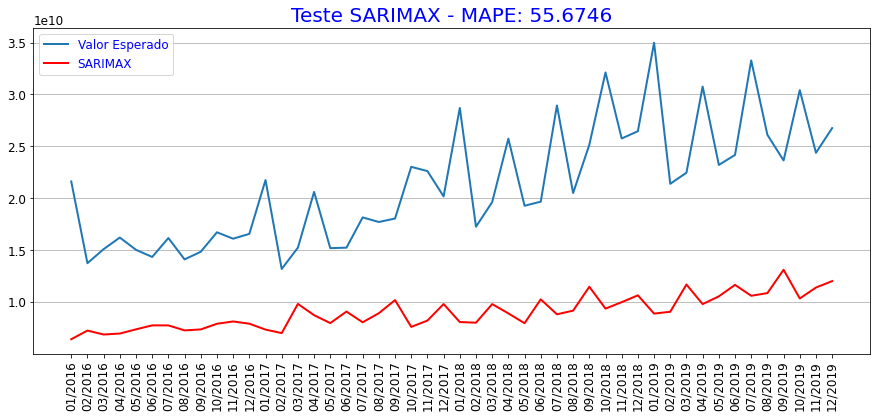

In [46]:
test_inv = scaler_in.inverse_transform(pd.DataFrame(test))
yhat_inv = scaler_in.inverse_transform(pd.DataFrame(yhat))

df_data = (pd.to_datetime(pd.DataFrame(test).index))


#Plota o resultado do modelo
fig, ax = plt.subplots()


ax.plot(test_inv, label='Valor Esperado')
ax.plot(yhat_inv, color='red', label='SARIMAX')
plt.title('Teste SARIMAX - MAPE: %.4f' % mape(yhat_inv,test_inv))
plt.grid(True,axis='y')
plt.xticks(np.arange(len(test)),df_data.strftime('%m/%Y'), rotation='vertical')
plt.legend(loc='upper left')
plt.legend(loc='upper left')

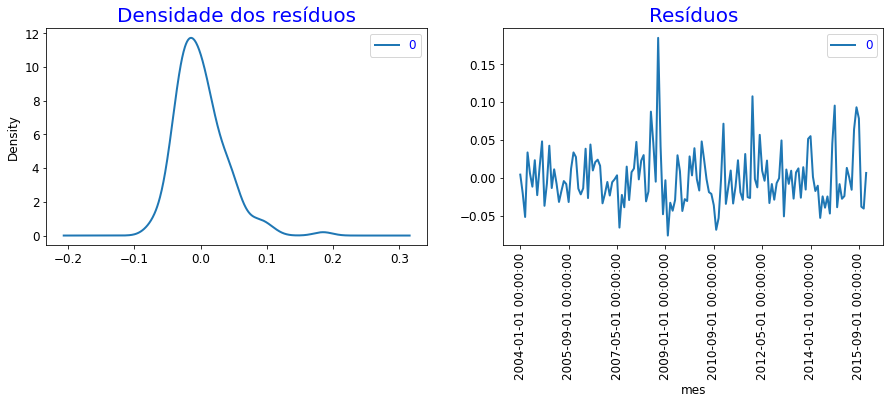

In [36]:
#Plotagem dos resíduos e densidade dos resíduos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,4))
residuals = pd.DataFrame(results.resid)
residuals.plot(ax=ax2, title='Resíduos', label=None)
residuals.plot(ax=ax1,kind='kde', title='Densidade dos resíduos')
plt.xticks(rotation='vertical')
plt.show()

[]

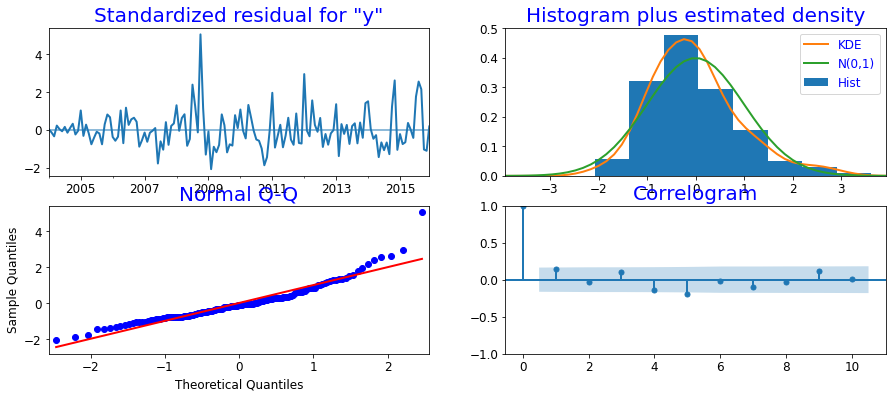

In [37]:
#Plota o diagnóstico do modelo 
results.plot_diagnostics()
plt.plot()

## 2.3 Validando a predição

In [38]:
if type(validacao_cluster2['arrecadacao']) == 'pandas.core.series.Series':
    validacao_cluster2 = pd.Series(validacao_cluster2['arrecadacao'].values, index=validacao_cluster2.index)
    
validacao_cluster2.head()

,arrecadacao
mes,
2020-01-01 00:00:00,1.000000
2020-02-01 00:00:00,0.425313
2020-03-01 00:00:00,0.301380
2020-04-01 00:00:00,0.336552
2020-05-01 00:00:00,0.034691


In [39]:
validacao_cluster2.head()

,arrecadacao
mes,
2020-01-01 00:00:00,1.000000
2020-02-01 00:00:00,0.425313
2020-03-01 00:00:00,0.301380
2020-04-01 00:00:00,0.336552
2020-05-01 00:00:00,0.034691


In [48]:

#Faz a previsão no mesmo tamanho que a base de teste
yhat = results.predict(start = 0, end= len(validacao_cluster2), exog=validacao_cluster2_exog)
yhat = np.array(yhat[1:])
yhat = pd.Series(yhat, index = validacao_cluster2.index)
#Obtém o intervalo de confiança 
conf_int = results.predict(end=len(validacao_cluster2), return_conf_int=True, alpha = 0.05, exog=validacao_cluster2_exog)

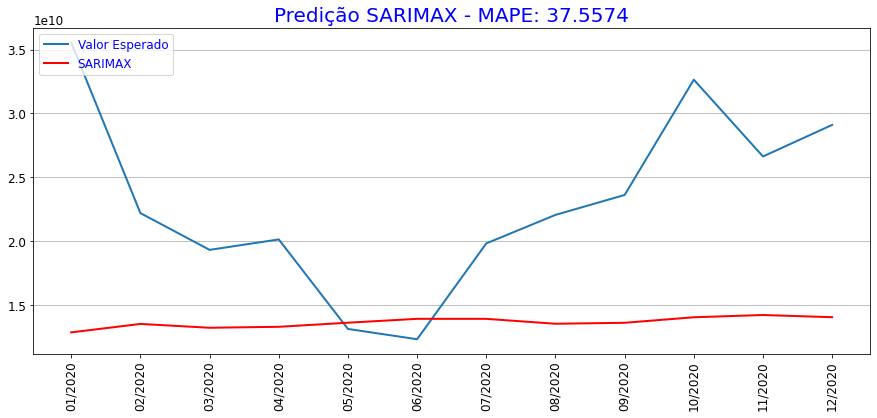

In [50]:
valid_inv = scaler_valid.inverse_transform(pd.DataFrame(validacao_cluster2))
yhat_inv = scaler_valid.inverse_transform(pd.DataFrame(yhat))

df_data = (pd.to_datetime(pd.DataFrame(validacao_cluster2).index))

#Plota o resultado do modelo
fig, ax = plt.subplots()


ax.plot(valid_inv, label='Valor Esperado')
ax.plot(yhat_inv, color='red', label='SARIMAX')
# plt.fill_between(validacao_cluster2.index, conf_int[1][:,0], conf_int[1][:,1], color='k', alpha=.08)
# plt.fill_between(validacao_cluster2.index, conf_int[0], conf_int[1], color='k', alpha=.08)
plt.title('Predição SARIMAX - MAPE: %.4f' % mape(yhat_inv,valid_inv))
plt.xticks(np.arange(len(validacao_cluster2)),df_data.strftime('%m/%Y'), rotation='vertical')
plt.grid(True,axis='y')
plt.legend(loc='upper left')

In [52]:
df_data

DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01'],
              dtype='datetime64[ns]', name='mes', freq=None)